<a href="https://colab.research.google.com/github/aaghouse/ML_UsedCarsPrice/blob/main/What_features_are_valuable_in_used_car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

In [ ]:
# There are about 18 features or columns from the dataset to analyze. While there are some that can be eliminated like the
# id there are several that can paint a picture as to what consumers value and will pay premium, expected or negotiate to pay.
# What features and in what order impacts the price of the used car ?
# What can a dealer take away as premium, necessity or discount category of features to improve sales.?

In [25]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
vehicles = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles.csv')
vehicles.tail()
#print(vehicles.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


In [33]:
print("Size of the Data Set")
print("--------------------")
print(vehicles.shape)
print("Data Understanding no of Zero values in critical 'price' and 'odometer' Features")
print("----------------------------------------------------------------------------------")
print(vehicles.eq(0).sum())
print("Data Understanding, no of null values in critical 'price' and 'odometer' Features")
print("----------------------------------------------------------------------------------")
print(vehicles.isnull().sum())

Size of the Data Set
--------------------
(426880, 18)
Data Understanding no of Zero values in critical 'price' and 'odometer' Features
----------------------------------------------------------------------------------
id                  0
region              0
price           32895
year                0
manufacturer        0
model               0
condition           0
cylinders           0
fuel                0
odometer         1965
title_status        0
transmission        0
VIN                 0
drive               0
size                0
type                0
paint_color         0
state               0
dtype: int64
Data Understanding, no of null values in critical 'price' and 'odometer' Features
----------------------------------------------------------------------------------
id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013


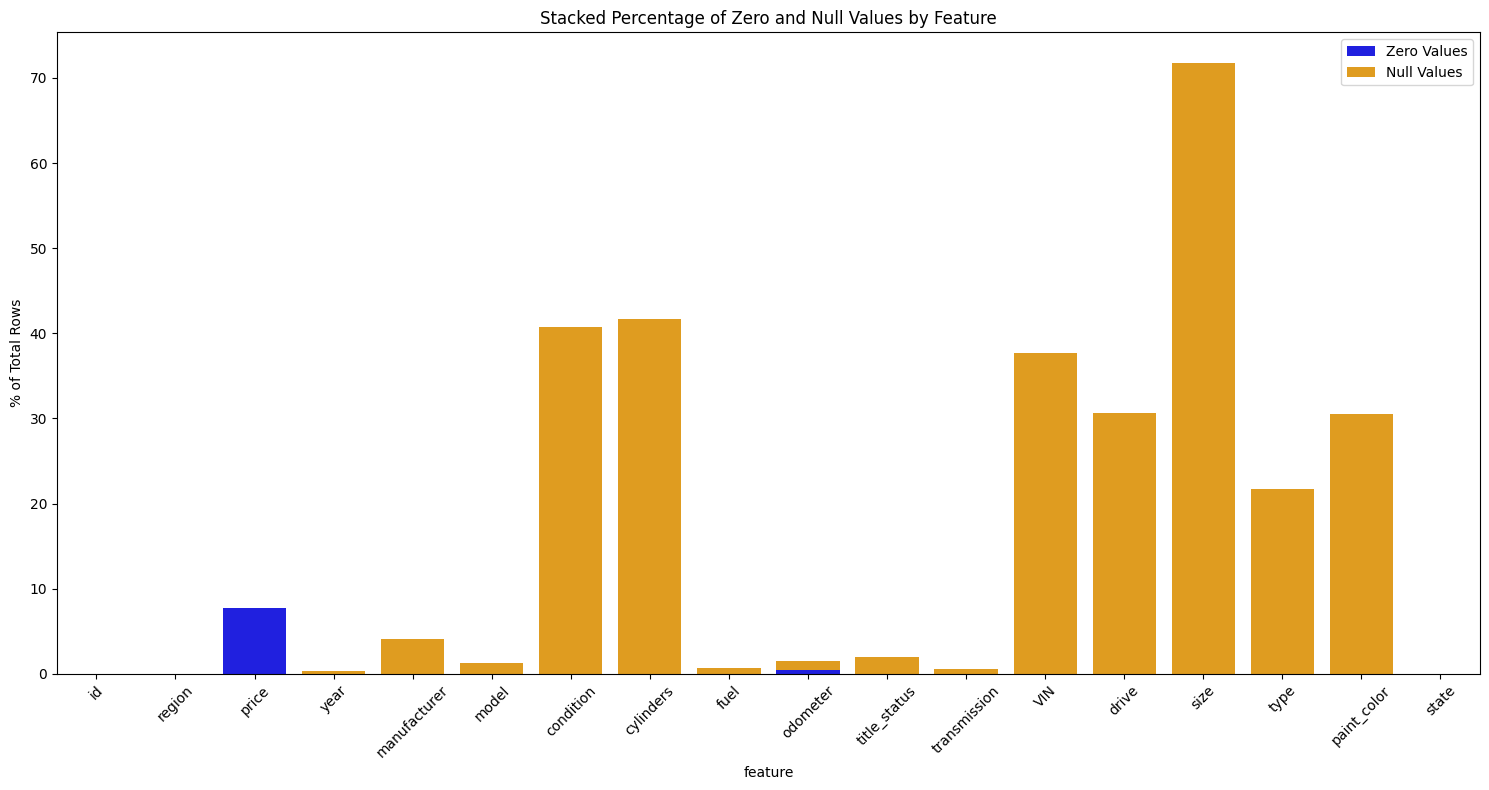

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data (replace this with your actual data)
data = {
    'feature': ['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'state'],
    'zero_values': [0, 0, 32895, 0, 0, 0, 0, 0, 0, 1965, 0, 0, 0, 0, 0, 0, 0, 0],
    'null_values': [0, 0, 0, 1205, 17646, 5277, 174104, 177678, 3013, 4400, 8242, 2556, 161042, 130567, 306361, 92858, 130203, 0]
}

# Convert data to a DataFrame
df = pd.DataFrame(data)

# Calculate percentages
total_rows = 426880
df['zero_percent'] = (df['zero_values'] / total_rows) * 100
df['null_percent'] = (df['null_values'] / total_rows) * 100

# Create a stacked bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='feature', y='zero_percent', color='blue', label='Zero Values')
sns.barplot(data=df, x='feature', y='null_percent', color='orange', bottom=df['zero_percent'], label='Null Values')
plt.xticks(rotation=45)
plt.ylabel('% of Total Rows')
plt.title('Stacked Percentage of Zero and Null Values by Feature')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
vehicles['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [ ]:
vehicles['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [ ]:
vehicles['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [ ]:
vehicles['title_status'].unique()

array([nan, 'clean', 'rebuilt', 'lien', 'salvage', 'missing',
       'parts only'], dtype=object)

In [ ]:
vehicles['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [ ]:
vehicles['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [ ]:
vehicles['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.impute import KNNImputer
vehicles = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles.csv')
print(vehicles['odometer'].eq(0).sum(), vehicles['price'].eq(0).sum())
vehicles.tail()


1965 32895


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy


/content


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [ ]:
vehicles.drop(['id', 'VIN'], axis=1, inplace=True)
vehicles[['odometer', 'price']] = vehicles[['odometer', 'price']].replace(0, np.nan)
columns_to_impute = ['odometer', 'price']
knn_imputer = KNNImputer(n_neighbors=2)
imputed_values = knn_imputer.fit_transform(vehicles[columns_to_impute])
vehicles_imp = vehicles.copy()
vehicles_imp[columns_to_impute] = imputed_values
print(vehicles_imp['odometer'].eq(0).sum(), vehicles_imp['price'].eq(0).sum())
#Imputed odometer and price zero or suspecious values with knn_imputer and filled it

0 0


In [ ]:
vehicles_imp['cylinders'] = vehicles_imp['cylinders'].fillna('np.nan')
cyl_order = [np.nan, 'other', '3 cylinders', '4 cylinders', '5 cylinders', '6 cylinders', '8 cylinders', '10 cylinders', '12 cylinders']
cyl_mapping = {value: index for index, value in enumerate(cyl_order)}
vehicles_imp['cylinders_labenc'] = vehicles['cylinders'].map(cyl_mapping)
vehicles_imp.drop(['cylinders'], axis=1, inplace=True)
#print(cyl_mapping)
#Mapping table: {nan: 0, 'other': 1, '3 cylinders': 2, '4 cylinders': 3, '5 cylinders': 4, '6 cylinders': 5, '8 cylinders': 6, '10 cylinders': 7, '12 cylinders': 8}
#Used LabelEncoder approach to address ordinal variables, droppd orig cylinders column


In [ ]:
vehicles_imp['cylinders_labenc'] = vehicles_imp['cylinders_labenc'].replace(0, np.nan)
cylcol_to_imp = ['cylinders_labenc']
knn_imputer_cyl = KNNImputer(n_neighbors=2)
imputed_val_cyl = knn_imputer_cyl.fit_transform(vehicles_imp[cylcol_to_imp])
vehicles_imp2 = vehicles_imp.copy()
vehicles_imp2[cylcol_to_imp] = imputed_val_cyl
print(vehicles_imp2['cylinders_labenc'].eq(0).sum())
#Large cylinders_labelenc column has zeros(conversion from Nan), filled with knnImputer

0


In [ ]:
vehicles_imp2['size'] = vehicles_imp2['size'].fillna('np.nan')
size_order = [np.nan, 'sub-compact', 'compact', 'mid-size', 'full-size']
size_mapping = {value: index for index, value in enumerate(size_order)}
vehicles_imp2['size_labenc'] = vehicles['size'].map(size_mapping)
vehicles_imp2.drop(['size'], axis=1, inplace=True)
print(size_mapping)
#Mapping table: {nan: 0, 'sub-compact': 1, 'compact': 2, 'mid-size': 3, 'full-size': 4}
#Used LabelEncoder approach to address ordinal variables, droppd orig size column

{nan: 0, 'sub-compact': 1, 'compact': 2, 'mid-size': 3, 'full-size': 4}


In [ ]:
vehicles_imp2['size_labenc'] = vehicles_imp2['size_labenc'].replace(0, np.nan)
szcol_to_imp = ['size_labenc']
knn_imputer_sz = KNNImputer(n_neighbors=2)
imputed_val_sz = knn_imputer_sz.fit_transform(vehicles_imp2[szcol_to_imp])
vehicles_imp3 = vehicles_imp2.copy()
vehicles_imp3[szcol_to_imp] = imputed_val_sz
print(vehicles_imp3['size_labenc'].eq(0).sum())
#Large size_labelenc column has zeros(conversion from Nan), filled with knnImputer (largest unknown column)

0


In [ ]:
vehicles_imp3['condition'] = vehicles_imp3['condition'].fillna('np.nan')
condition_order = [np.nan, 'salvage', 'new', 'like new', 'fair', 'good', 'excellent']
condition_mapping = {value: index for index, value in enumerate(condition_order)}
vehicles_imp3['condition_labenc'] = vehicles_imp3['condition'].map(condition_mapping)
vehicles_imp3.drop(['condition'], axis=1, inplace=True)
#print(condition_mapping)
#Mapping table: {nan: 0, 'salvage': 1, 'new': 2, 'like new': 3, 'fair': 4, 'good': 5, 'excellent': 6}
# labelencoded ordinal conditions column and dropped condition

In [ ]:
vehicles_imp3['condition_labenc'] = vehicles_imp3['condition_labenc'].replace(0, np.nan)
conditioncol_to_imp = ['condition_labenc']
knn_imputer_condition = KNNImputer(n_neighbors=2)
imputed_val_condition = knn_imputer_sz.fit_transform(vehicles_imp3[conditioncol_to_imp])
vehicles_imp4 = vehicles_imp3.copy()
vehicles_imp4[conditioncol_to_imp] = imputed_val_condition
print(vehicles_imp4['condition_labenc'].eq(0).sum())
## condition_labelenc column has zeros(conversion from Nan), filled with knnImputer

0


In [ ]:
from google.colab import files
vehicles_imp4.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp4.csv', encoding = 'utf-8-sig')

In [ ]:
vehicles_imp4 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp4.csv')
vehicles_imp4['title_status'] = vehicles_imp4['title_status'].fillna('np.nan')
title_status_order = [np.nan, 'parts only', 'missing', 'salvage', 'lien', 'rebuilt', 'clean']
title_mapping = {value: index for index, value in enumerate(title_status_order)}
vehicles_imp4['title_status_labenc'] = vehicles_imp4['title_status'].map(title_mapping)
vehicles_imp4.drop(['title_status'], axis=1, inplace=True)
print(title_mapping)
#Mapping table: {nan: 0, 'parts only': 1, 'missing': 2, 'salvage': 3, 'lien': 4, 'rebuilt': 5, 'clean': 6}
# labelencoded ordinal title_status column and dropped title_status

{nan: 0, 'parts only': 1, 'missing': 2, 'salvage': 3, 'lien': 4, 'rebuilt': 5, 'clean': 6}


In [ ]:
vehicles_imp4['title_status_labenc'] = vehicles_imp4['title_status_labenc'].replace(0, np.nan)
titlestatscol_to_imp = ['title_status_labenc']
knn_imputer_titlestats = KNNImputer(n_neighbors=2)
imputed_val_titlestats = knn_imputer_titlestats.fit_transform(vehicles_imp4[titlestatscol_to_imp])
vehicles_imp5 = vehicles_imp4.copy()
vehicles_imp5[titlestatscol_to_imp] = imputed_val_titlestats
print(vehicles_imp5['title_status_labenc'].eq(0).sum())
## title_status_labelenc column has zeros(conversion from Nan) later was filled with knnImputer

0


In [ ]:
vehicles_imp5['drive'] = vehicles_imp5['drive'].fillna('np.nan')
drive_order = [np.nan, 'fwd', '4wd', 'rwd']
drive_mapping = {value: index for index, value in enumerate(drive_order)}
vehicles_imp5['drive_labenc'] = vehicles_imp5['drive'].map(drive_mapping)
vehicles_imp5.drop(['drive'], axis=1, inplace=True)
print(drive_mapping)
#Mapping table: {nan: 0, 'fwd': 1, '4wd': 2, 'rwd': 3}

{nan: 0, 'fwd': 1, '4wd': 2, 'rwd': 3}


In [ ]:
vehicles_imp5['drive_labenc'] = vehicles_imp5['drive_labenc'].replace(0, np.nan)
drivecol_to_imp = ['drive_labenc']
knn_imputer_drive = KNNImputer(n_neighbors=2)
imputed_val_drive = knn_imputer_drive.fit_transform(vehicles_imp5[drivecol_to_imp])
vehicles_imp6 = vehicles_imp5.copy()
vehicles_imp6[drivecol_to_imp] = imputed_val_drive
print(vehicles_imp6['drive_labenc'].eq(0).sum())

0


In [55]:
from google.colab import files
vehicles_imp6.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6.csv', encoding = 'utf-8-sig')

In [57]:
#vehicles_imp6.drop(['Unnamed: 0', 'model', 'paint_color'], axis=1, inplace=True)
# - Completed above.
vehicles_imp6 = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6.csv')
vehicles_imp6.drop('Unnamed: 0', axis=1, inplace=True)
print(vehicles_imp6['cylinders_labenc'].eq(0).sum())
print(vehicles_imp6.isnull().sum())

0
price                      0
year                    1205
manufacturer           17646
fuel                    3013
odometer                   0
transmission            2556
type                   92858
cylinders_labenc           0
size_labenc                0
condition_labenc           0
title_status_labenc        0
drive_labenc               0
region_state               0
dtype: int64


In [58]:
#Encoding manufacturer, fuel, transmission, type, region state  columns using JamesSteinEncoder
# JamesSteinEncoder's approach missing values are dealt with filling in mean of the encoding columns by default.
!pip install category_encoders
vehicles_imp6.rename(columns={'region State': 'region_state'}, inplace=True)
from category_encoders import JamesSteinEncoder
columns_to_encode = ['manufacturer', 'fuel', 'transmission', 'type', 'region_state']
encoder = JamesSteinEncoder(cols=columns_to_encode)
vehicles_imp6_jsenc = encoder.fit_transform(vehicles_imp6, vehicles_imp6['price'])
vehicles_imp6_jsenc.dropna(subset=['year'], inplace=True)
rows_with_nulls = vehicles_imp6_jsenc[vehicles_imp6_jsenc.isna().any(axis=1)]
#vehicles_imp6_jsenc.isnull().sum()
columns_to_round = ['year', 'odometer', 'cylinders_labenc', 'size_labenc', 'condition_labenc', 'title_status_labenc',	'drive_labenc']
vehicles_imp6_jsenc[columns_to_round] = vehicles_imp6_jsenc[columns_to_round].round().astype(int)
print(vehicles_imp6_jsenc.shape)
vehicles_imp6_jsenc.tail()
print(vehicles_imp6_jsenc.isnull().sum())
#New file vehicle_imp6_jsen.csv now includes JamesStineEncoded values without scalling the features
from google.colab import files
vehicles_imp6_jsenc.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv', encoding = 'utf-8-sig')


(425675, 13)
price                  0
year                   0
manufacturer           0
fuel                   0
odometer               0
transmission           0
type                   0
cylinders_labenc       0
size_labenc            0
condition_labenc       0
title_status_labenc    0
drive_labenc           0
region_state           0
dtype: int64


In [18]:
vehicles_imp6_jsenc = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsenc.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsenc.reset_index(drop=True)
print(vehicles_imp6_jsenc.columns, vehicles_imp6_jsenc.head())
from google.colab import files
vehicles_imp6_jsenc.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv', encoding = 'utf-8-sig')


Index(['price', 'year', 'manufacturer', 'fuel', 'odometer', 'transmission',
       'type', 'cylinders_labenc', 'size_labenc', 'condition_labenc',
       'title_status_labenc', 'drive_labenc', 'region_state'],
      dtype='object')      price  year   manufacturer          fuel  odometer   transmission  \
0  33590.0  2014  165938.007991  96480.664491     57923   39213.718334   
1  22590.0  2010  122184.001341  96480.664491     71229   39213.718334   
2  39590.0  2020  122184.001341  96480.664491     19160   39213.718334   
3  30990.0  2017  146203.006575  96480.664491     41124   39213.718334   
4  15000.0  2013  100676.794831  96480.664491    128000  111809.426433   

            type  cylinders_labenc  size_labenc  condition_labenc  \
0  124437.193853                 6            3                 5   
1  124437.193853                 6            3                 5   
2  124437.193853                 6            3                 5   
3  124437.193853                 6            3 

In [83]:
#Scaling the dataframe
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
vehicles_scaled = pd.DataFrame(scaler.fit_transform(vehicles_imp6_jsenc), columns=vehicles_imp6_jsenc.columns)
vehicles_scaled.head()
vehicles_scaled.to_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsenc_scaled.csv', encoding = 'utf-8-sig')

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
X = vehicles_imp6_jsenc.drop('price', axis=1)
y = vehicles_imp6_jsenc[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Different amounts of regularization (alpha values)
alpha_values = [0.0, 0.1, 1.0, 10.0, 100, 10000, 100000, 1000000]
rows = []
for alpha in alpha_values:
    # Initialize Ridge model
    ridge_model = Ridge(alpha=alpha)

    # Fit the model
    ridge_model.fit(X_train, y_train)

    # Predict on test set
    y_pred = ridge_model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)

    print(f"Ridge model with alpha = {alpha}")
    print(f"Coefficients: {ridge_model.coef_}")
    print(f"Intercept: {ridge_model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print("-------------------")
    rows.append([alpha, mse])
    Xtrain_features = X_train.columns
    coefficients_list = (ridge_model.coef_).tolist()
    coefficients_df = pd.DataFrame({'Feature': Xtrain_features, 'Coefficient': coefficients_list[0]})
    sorted_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
    print(sorted_df)

vehicles_feature_alpha_mse_ridge = pd.DataFrame(rows, columns=['alpha', 'mse'])
vehicles_feature_alpha_mse_ridge.head()

Ridge model with alpha = 0.0
Coefficients: [[-4.63963608e+03  1.25296495e+00  6.15414089e-01  3.81264544e-02
  -1.66424965e-01  1.11784734e+00  3.05441874e+03 -4.82389711e+04
  -2.72775028e+04 -8.02955865e+03  3.53676167e+04  4.60483497e+00]]
Intercept: [9262703.41786486]
Mean Squared Error: 300447121989076.44
-------------------
                Feature   Coefficient
10         drive_labenc  35367.616687
6      cylinders_labenc   3054.418737
11         region_state      4.604835
1          manufacturer      1.252965
5                  type      1.117847
2                  fuel      0.615414
3              odometer      0.038126
4          transmission     -0.166425
0                  year  -4639.636083
9   title_status_labenc  -8029.558649
8      condition_labenc -27277.502780
7           size_labenc -48238.971099
Ridge model with alpha = 0.1
Coefficients: [[-4.63963626e+03  1.25296495e+00  6.15414031e-01  3.81264486e-02
  -1.66425005e-01  1.11784739e+00  3.05441664e+03 -4.82388990e+04

,alpha,mse
0,0.0,3.004471e+14
1,0.1,3.004471e+14
2,1.0,3.004471e+14
3,10.0,3.004471e+14
4,100.0,3.004471e+14


In [78]:
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)

0.0005474436724064446

In [27]:
from sklearn.inspection import permutation_importance
print('Model:', model)
X = vehicles_imp6_jsenc.drop('price', axis=1)
y = vehicles_imp6_jsenc[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

r = permutation_importance(model, X_test, y_test,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{X_test.columns[i]:<8}\t"
               f"{r.importances_mean[i]:.5f}"
               f" +/- {r.importances_std[i]:.5f}")


Model: Ridge(alpha=10)
region_state	0.00000 +/- 0.00000
odometer	0.00000 +/- 0.00000


After cleaning the data, prepped data and scaling the data. Alpha value of 10 seems to be ideal when doing Ridge modeling. MSE value for test data set seem to go down reach the minimum at alpha =10 and then starts increasing.

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
vehicles_scaled = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsenc_scaled.csv')
vehicles_scaled.drop(['Unnamed: 0'], axis=1, inplace=True)
print(vehicles_scaled.columns)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
M = vehicles_scaled.drop('price', axis=1)
n = vehicles_scaled[['price']]

M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=42)

# Different amounts of regularization (alpha values)
alpha_values = [0.0, 0.1, 1.0, 10.0, 100, 10000, 100000, 1000000]
srows = []
for alpha in alpha_values:
    # Initialize Ridge model
    ridge_model = Ridge(alpha=alpha)

    # Fit the model
    ridge_model.fit(M_train, n_train)

    # Predict on test set
    n_pred = ridge_model.predict(M_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(n_test, n_pred)

    print(f"Ridge model with alpha = {alpha}")
    print(f"Coefficients: {ridge_model.coef_}")
    print(f"Intercept: {ridge_model.intercept_}")
    print(f"Mean Squared Error: {mse}")
    print("-------------------")
    srows.append([alpha, mse])
    Mtrain_features = M_train.columns
    coefficients_list = (ridge_model.coef_).tolist()
    coefficients_df = pd.DataFrame({'Feature': Mtrain_features, 'Coefficient': coefficients_list[0]})
    sorted_df = coefficients_df.sort_values(by='Coefficient', ascending=False)
    print(sorted_df)

vehicles_feature_scaled_alpha_mse_ridge = pd.DataFrame(srows, columns=['alpha', 'mse'])
vehicles_feature_scaled_alpha_mse_ridge.head()


Index(['price', 'year', 'manufacturer', 'fuel', 'odometer', 'transmission',
       'type', 'cylinders_labenc', 'size_labenc', 'condition_labenc',
       'title_status_labenc', 'drive_labenc', 'region_state'],
      dtype='object')
Ridge model with alpha = 0.0
Coefficients: [[-0.00316989  0.00508219  0.00156001  0.00058908 -0.00039245  0.00388081
   0.00021367 -0.00162353 -0.00138264 -0.00022508  0.00156162  0.01786695]]
Intercept: [-0.00085339]
Mean Squared Error: 1.5697514054711355
-------------------
                Feature  Coefficient
11         region_state     0.017867
1          manufacturer     0.005082
5                  type     0.003881
10         drive_labenc     0.001562
2                  fuel     0.001560
3              odometer     0.000589
6      cylinders_labenc     0.000214
9   title_status_labenc    -0.000225
4          transmission    -0.000392
8      condition_labenc    -0.001383
7           size_labenc    -0.001624
0                  year    -0.003170
Ridge model

,alpha,mse
0,0.0,1.569751
1,0.1,1.569751
2,1.0,1.569751
3,10.0,1.569751
4,100.0,1.569752


In [29]:
model = Ridge(alpha=10).fit(M_train, n_train)
model.score(M_test, n_test)

0.0005474366628003269

In [30]:
print('Model:', model)
M = vehicles_scaled.drop('price', axis=1)
n = vehicles_scaled[['price']]

M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=42)

r = permutation_importance(model, M_test, n_test,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{M_test.columns[i]:<8}\t"
               f"{r.importances_mean[i]:.5f}"
               f" +/- {r.importances_std[i]:.5f}")

Model: Ridge(alpha=10)
region_state	0.00068 +/- 0.00007
odometer	0.00003 +/- 0.00000


In [31]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

print(vehicles_scaled.columns)
#generate train/test data for auto
auto_X = vehicles_scaled.drop(['price'], axis = 1)
auto_y = vehicles_scaled['price']
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)
np.set_printoptions(precision=2)
auto_pipe = ''
lasso_coefs = ''
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_


print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

Index(['price', 'year', 'manufacturer', 'fuel', 'odometer', 'transmission',
       'type', 'cylinders_labenc', 'size_labenc', 'condition_labenc',
       'title_status_labenc', 'drive_labenc', 'region_state'],
      dtype='object')
<class 'numpy.ndarray'>
[-0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0. -0. -0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
 -0.  0. -0.  0.  0. -0.  0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.
 -0.  0.  0. -0. -0.  0.  0.  0.  0.  0. -0. -0.  0.  0.  0. -0. -0. -0.
  0. -0.  0. -0. -0.  0.  0.  0. -0. -0.  0.  0. -0.  0.  0. -0.  0.  0.
 -0.  0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0. -0. -0. -0. -0. -0. -0.
  0.  0. -0. -0. -0. -0.  0. -0. -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.
 -0. -0.  0. -0. -0. -0. -0. -0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.
 -0. -0. -0.  0. -0.  0. -0. -0. -0. -0.  0. -0. -0. -0.  0.  0.  0.  0.
  0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0. -0.  0.  0.  0.  0.  0.
 -0.  0. -0.  0

Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

Scalled model was given as an input and that seems to have produced co-efficients of all nearly zero values.

In [27]:
# Drafting unscalled dataset and now putting it throguh the pipeline, including standardscalar and generating results.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import set_config
set_config(display="diagram")

vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
vehicles_imp6_jsen.head()
#generate train/test data for auto
auto_X = vehicles_imp6_jsen.drop(['price'], axis = 1)
auto_y = vehicles_imp6_jsen['price']
auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)
np.set_printoptions(precision=2)
auto_pipe = ''
lasso_coefs = ''
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_


print(type(lasso_coefs))
print(lasso_coefs)
auto_pipe

<class 'numpy.ndarray'>
[-3.76e+05 -2.57e+05 -1.77e+04  6.83e+05 -9.44e+04 -1.69e+05 -2.33e+05
  1.31e+05 -1.50e+04  1.25e+05 -2.45e+05 -5.94e+05  1.41e+05 -7.93e+04
 -6.10e+04 -1.09e+06  7.23e+04  1.79e+04  1.07e+05  5.29e+04  2.62e+04
 -7.42e+04  6.80e+04 -3.93e+05 -5.17e+05  4.10e+05 -4.14e+05  1.62e+05
 -3.51e+05  4.76e+05  3.46e+05 -2.08e+05  3.44e+04 -3.57e+05 -1.76e+06
 -8.37e+03  5.63e+05 -4.22e+05  4.66e+05 -2.28e+05 -1.04e+05 -8.60e+04
 -2.15e+05 -3.90e+05  1.71e+05 -8.34e+05  2.31e+05  4.24e+05 -3.62e+05
  4.93e+05  1.17e+05  1.71e+05  1.79e+05 -3.56e+06  5.86e+05  1.90e+05
  2.61e+05 -3.39e+04 -2.74e+05 -1.12e+05  3.89e+05  1.25e+06  1.05e+05
 -2.44e+05  8.63e+04  3.87e+04  1.75e+04  8.80e+04  5.23e+05  4.44e+05
 -4.45e+05  2.66e+05 -1.49e+04  9.81e+03  1.94e+05  2.05e+05 -1.85e+05
  4.90e+04  8.96e+04  7.14e+05  2.90e+05 -1.67e+05 -2.52e+05  1.46e+05
  1.72e+05  7.90e+04 -1.77e+05 -2.47e+05 -1.99e+06 -5.35e+05  1.98e+05
  5.15e+05  4.25e+05  1.39e+05 -8.62e+05 -6.85e+05 -1

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+19, tolerance: 3.994e+15
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()),
                ('lasso', Lasso(random_state=42))])

Unscalled model was given as an input and that yields co-efficients for almost all the values or features. Next is to produce MSE's and see where it leads.

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lasso_train_mse = ''
lasso_test_mse = ''

from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
auto_X = vehicles_imp6_jsen.drop(['price'], axis = 1)
auto_y = vehicles_imp6_jsen['price']

auto_pipe = ''
lasso_coefs = ''
auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_

auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)

lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))

# Answer check
print(lasso_train_mse)
print(lasso_test_mse)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+19, tolerance: 3.994e+15
  model = cd_fast.enet_coordinate_descent(


132919840681931.0
325589202962978.94


MSE for train and test sets are too high.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Researching on co-linearity
X =''
y=''
def sk_vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i !=exog]
    # split the dataset, one independent variable against all others
    X, y = data[not_exog], data[exog]

    # fit the model and obtain R^2
    r_squared = LinearRegression().fit(X,y).score(X,y)

    # compute the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF": vif_dict})

#X= cali_encoded.drop(columns = 'median_house_value')
#y = cali_encoded.median_house_value
from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X = vehicles_imp6_jsen.drop(['price'], axis = 1)
y = vehicles_imp6_jsen['price']

print("Original dataset")
sk_vif(X.columns, X).sort_values(by='VIF', ascending = False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Original dataset


,VIF
cylinders_labenc,1.321140
transmission,1.218108
drive_labenc,1.200827
year,1.186385
type,1.124402
size_labenc,1.076581
manufacturer,1.055559
odometer,1.035346
fuel,1.031895
title_status_labenc,1.015718


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


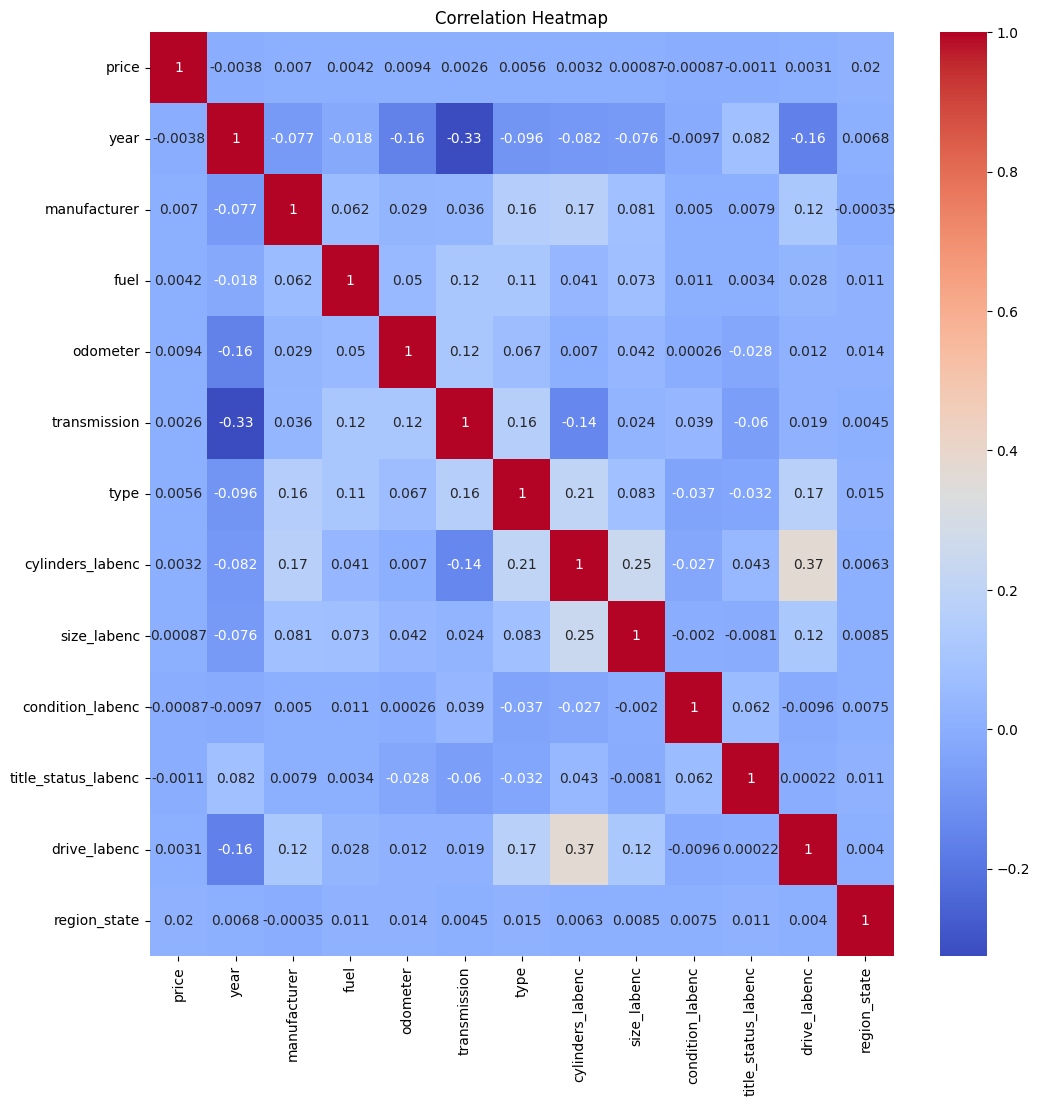

In [11]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True)
correlation_matrix = df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Features that may be too clsely co-related that could be removed.
1. **cylinders_labenc** <> drive_labenc  ( top +ve co-relation)
2. **year** <> transmission (top -ve co-relation)
3. drive_labenc <> **year ** (-ve  co-rel)
4. **cylinders_labenc** <> transmission (-ve co-rel)
5. size_labenc <> **cylinders_labenc** (+ve co-rel)
6. **cylinders_labenc** <> type

All BOLD above to be removed to improve model performance.

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.reset_index(drop=True)
df_opt = df.drop(['cylinders_labenc', 'year'], axis=1)
print(df_opt.columns)


# Researching on co-linearity
X =''
y=''
def sk_vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i !=exog]
    # split the dataset, one independent variable against all others
    X, y = data[not_exog], data[exog]

    # fit the model and obtain R^2
    r_squared = LinearRegression().fit(X,y).score(X,y)

    # compute the VIF
    vif = 1/(1-r_squared)
    vif_dict[exog] = vif

  return pd.DataFrame({"VIF": vif_dict})

X = df_opt.drop(['price'], axis = 1)
y = df_opt['price']

print("Original dataset")
sk_vif(X.columns, X).sort_values(by='VIF', ascending = False)


Index(['price', 'manufacturer', 'fuel', 'odometer', 'transmission', 'type',
       'size_labenc', 'condition_labenc', 'title_status_labenc',
       'drive_labenc', 'region_state'],
      dtype='object')
Original dataset


,VIF
type,1.094398
transmission,1.054705
drive_labenc,1.052738
manufacturer,1.042665
fuel,1.030059
size_labenc,1.028348
odometer,1.019033
title_status_labenc,1.009084
condition_labenc,1.007687
region_state,1.000728


In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

lasso_train_mse = ''
lasso_test_mse = ''

from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
auto_X = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
auto_y = vehicles_imp6_jsen['price']
print(auto_X.shape, auto_y.shape)
auto_pipe = ''
lasso_coefs = ''

auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)

auto_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('lasso', Lasso(random_state = 42))])
auto_pipe.fit(auto_X_train, auto_y_train)
lasso_coefs = auto_pipe.named_steps['lasso'].coef_



lasso_train_mse = mean_squared_error(auto_y_train, auto_pipe.predict(auto_X_train))
lasso_test_mse = mean_squared_error(auto_y_test, auto_pipe.predict(auto_X_test))

# Answer check
print(lasso_train_mse)
print(lasso_test_mse)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(425675, 10) (425675,)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.979e+19, tolerance: 3.994e+15
  model = cd_fast.enet_coordinate_descent(


132983124868972.1
326318813424827.44


In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

ridge_train_mse = ''
ridge_test_mse = ''

from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
auto_X = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
auto_y = vehicles_imp6_jsen['price']
print(auto_X.shape, auto_y.shape)
auto_pipe_ridge = ''
lasso_coefs_ridge = ''

auto_X_train, auto_X_test, auto_y_train, auto_y_test = train_test_split(auto_X, auto_y,
                                                                       test_size = 0.3,
                                                                       random_state = 42)

auto_pipe_ridge = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
                      ('scaler', StandardScaler()),
                     ('ridge', Ridge(random_state=42))])
auto_pipe_ridge.fit(auto_X_train, auto_y_train)
ridge_coefs = auto_pipe_ridge.named_steps['ridge'].coef_

ridge_train_mse = mean_squared_error(auto_y_train, auto_pipe_ridge.predict(auto_X_train))
ridge_test_mse = mean_squared_error(auto_y_test, auto_pipe_ridge.predict(auto_X_test))

# Answer check
print(ridge_train_mse)
print(ridge_test_mse)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(425675, 10) (425675,)
132943635832715.23
326180953743703.2


In [35]:
from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
y = vehicles_imp6_jsen['price']
ss = StandardScaler()
lr = LinearRegression()
pipe = Pipeline([('scaline', ss), ('linear', lr)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


0.0005676513626871049

**LR Model score (567651 * 10 exp -9) seems to be better** than
Lasso Model alpha=10 score(567608 * 10 exp -9)
&
Lasso model with all features(5474366 * 10 exp -9)

Next step is to move into further reducng the features using permutation importance.



---



In [36]:
from google.colab import drive
drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis=1)
y = vehicles_imp6_jsen['price']

ss = StandardScaler()
lasso = Lasso(alpha=10, random_state=42)
pipe = Pipeline([('scaling', ss), ('lasso', lasso)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipe.fit(X_train, y_train)
r2_score = pipe.score(X_test, y_test)
print("R-squared score:", r2_score)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
R-squared score: 0.0005676084764952849


In [39]:
from google.colab import drive
from sklearn.inspection import permutation_importance

drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
y = vehicles_imp6_jsen['price']
ss = StandardScaler()
lr = LinearRegression()
pipe = Pipeline([('scaline', ss), ('linear', lr)])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression().fit(X_train, y_train)
print('Model:', model)

M = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
n = vehicles_imp6_jsen['price']
M_train, M_test, n_train, n_test = train_test_split(M, n, test_size=0.2, random_state=42)

r = permutation_importance(model, M_test, n_test,
                            n_repeats=30,
                            random_state=0)
for i in r.importances_mean.argsort()[::-1]:
     if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
         print(f"{M_test.columns[i]:<8}\t"
               f"{r.importances_mean[i]:.5f}"
               f" +/- {r.importances_std[i]:.5f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model: LinearRegression()
region_state	0.00068 +/- 0.00007
odometer	0.00005 +/- 0.00000


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X1 = vehicles_imp6_jsen.drop(['price', 'cylinders_labenc', 'year'], axis = 1)
y = vehicles_imp6_jsen['price']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=22)


train_mses = []
test_mses = []
#for degree in 1 - 3
for i in range(1, 4):
    poly_model = Pipeline([
        ('Poly', PolynomialFeatures(degree=i)),
        ('model', LinearRegression(fit_intercept=False))
    ])
    poly_model.fit(X_train,y_train)
    p2 = poly_model.predict(X_test)

    test_mses.append(mean_squared_error(y_test, p2))

best_complexity = test_mses.index(min(test_mses)) + 1
best_mse = min(test_mses)
print('best_complexity', best_complexity)
print('test_mses', test_mses)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
best_complexity 1
test_mses [110657845740243.31, 110866731930317.33, 127293787324541.22]


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X1 = vehicles_imp6_jsen[['region_state', 'odometer']]
y = vehicles_imp6_jsen['price']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=22)


train_mses = []
test_mses = []
poly_model = Pipeline([
      ('Poly', PolynomialFeatures(degree=1)),
      ('model', LinearRegression(fit_intercept=False))
  ])
poly_model.fit(X_train,y_train)
p2 = poly_model.predict(X_test)
p1 = poly_model.predict(X_train)

test_mse = mean_squared_error(y_test, p2)
train_mse = mean_squared_error(y_train, p1)
print('test_mse', test_mse)
print('train_mse', train_mse)

poly_model.get_params()

param_grid = {'model__fit_intercept': [True, False], 'model__positive': [False, True]}
for i in range(2, 11):
    grid = GridSearchCV(poly_model, param_grid, cv=i)
    grid.fit(X_train, y_train)
    print(f"Best score for cv={i}: {grid.best_score_}")




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test_mse 110660202658226.55
train_mse 225868724803337.34
Best score for cv=2: -0.00037480509741483203
Best score for cv=3: -0.0077546711135347834
Best score for cv=4: -0.01049491333423333
Best score for cv=5: -0.0056480785235154315
Best score for cv=6: -1.7260406986328494
Best score for cv=7: -1.48149373682018
Best score for cv=8: -1.1033301327679168
Best score for cv=9: -37.14214486118321
Best score for cv=10: -45.8009733900844


-ve model score suggest there may be a probem with the scoring metric for this data. With that said. Score closest to zero is a better score. In this case
cv = 2 is better.

In [14]:
grid = GridSearchCV(poly_model, param_grid, cv=2)
grid.fit(X_train, y_train)
grid.best_params_

{'model__fit_intercept': False, 'model__positive': True}

Hyper Parameters: 'model__fit_intercept': False & 'model__positive': True
are False and True respectively are better values to get better prediction values with least error.

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X1 = vehicles_imp6_jsen[['region_state', 'odometer']]
y = vehicles_imp6_jsen['price']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=22)


train_mses = []
test_mses = []
poly_model = Pipeline([
      ('Poly', PolynomialFeatures(degree=1)),
      ('model', LinearRegression(fit_intercept=False, positive=True))

  ])
poly_model.fit(X_train,y_train)
p2 = poly_model.predict(X_test)
p1 = poly_model.predict(X_train)

test_mse = mean_squared_error(y_test, p2)
train_mse = mean_squared_error(y_train, p1)
print('test_mse', test_mse)
print('train_mse', train_mse)

poly_model.get_params()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test_mse 110665904052923.72
train_mse 225883281559372.72


{'memory': None,
 'steps': [('Poly', PolynomialFeatures(degree=1)),
  ('model', LinearRegression(fit_intercept=False, positive=True))],
 'verbose': False,
 'Poly': PolynomialFeatures(degree=1),
 'model': LinearRegression(fit_intercept=False, positive=True),
 'Poly__degree': 1,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'model__copy_X': True,
 'model__fit_intercept': False,
 'model__n_jobs': None,
 'model__positive': True}

**Best Model:** 'model', LinearRegression(fit_intercept=False, positive=True)
**Best MSE test set score**: 110665904052923.72
**Best Features** to select for better prediction: 'region_state', 'odometer'
**Best Degree for the polunomial**: 1

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

**Understanding the Dataset for analysis and treating/cleaning**  
1.Data Cleaning, dropping all rows with Nan/Zero values the size reduced from [426880 rows to 80170 rows] Dropping 82% of the data set would yield bad results. Hence Imputing values (with KNNImputer) that are missign/zero are essential. This was done to treat all zero and missing values in price and odometer.

2.KNNImputer was also choosen to impute cylinders, size, condition, title_status & drive. KNNImputer also fixes missing values with feature mean.
All these columns were also encoded with JamesSteinEncoder for Categorical encoding.

3.Dropped color, model, id and VIN from the dataset that does not add value to the price of the car.

4.Combined region and state to region_state, dropped individual region and state fields.

**Choosing the Features and the right Model**
1.Started with Ridge model, tried scalled and unscalled data. Scalled yielded better results. Permutation importance suggested reion_state and odometer to have the best impact on price and would be ideal to chooe to reduce model features. MSE for test data set was high

2.Tried LASSO model with polynomial (degree=3) MSE for test data set was not any better.

3.Tried simple linear regression, estimated VIF(variance Inflaction Factor)
 Features were reasonably corelated to each other. Performing correlation heat map I reduced the feature set by two (dropped cylinders and year) Post dropping VIF now was looking bettter than before.

 **Scoring model with reduced features**
 1. Tried scoring on Ridge, LASSO, and Linear regression.
 2. LinearRegression performend better (poly degree=1), MSE on test dataset improved slightly as well.
 3. Performed GridSearch on hyperparameters on this LinearRegression model and decided on model__fit_intercept: False & model__positive: True this improved the model performance a ittle better with improved MSE on test dataset as well.

 **Summary**
 Input dataset for Analysis is missing critical large 80+% which contributes to a large extent negative model stability. Given the data set we can say region_state where used cars are sold and odomer reading are the most critical to get the best price for the car.

 Best model to use to predict would be LinearRegression, polunomial degree=1, hyper parameters model__fit_intercept: False & model__positive: True. Which means there has to be a compensating factor in addition to the data provided to get the best price of the used car.

 **Next Steps**
 Iterate throguh the model LinearRegression, go throguh grid search to identify better features combination. Then rerun the model to see if it would effectively improve the model score and MSE values.

 Next steps as seen below to iterate over Sequential Feature Selector with 3 features is making the test MSE worst. We are getting better results with two features and simple Linear Regression.


In [23]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X1 = vehicles_imp6_jsen.drop(['price'], axis = 1) # Initial df
y = vehicles_imp6_jsen['price']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=22)

best_estimator = ''
best_selector = ''
best_model = ''
feature_names = ''
coefs = ''

selector_pipe = Pipeline([('selector', SequentialFeatureSelector(LinearRegression())),
                         ('model', LinearRegression())])
selector_pipe

param_dict = {'selector__n_features_to_select': [2, 3, 4, 5]}
selector_grid = GridSearchCV(selector_pipe, param_grid=param_dict)
selector_grid.fit(X_train, y_train)
train_preds = selector_grid.predict(X_train)
test_preds = selector_grid.predict(X_test)
selector_train_mse = mean_squared_error(y_train, train_preds)
selector_test_mse = mean_squared_error(y_test, test_preds)
print('selector_train_mse', selector_train_mse)
print('selector_test_mse', selector_test_mse)

### BEGIN SOLUTION
best_estimator = selector_grid.best_estimator_
best_selector = best_estimator.named_steps['selector']
best_model = selector_grid.best_estimator_.named_steps['model']
feature_names = X_train.columns[best_selector.get_support()]
coefs = best_model.coef_
### END SOLUTION

# Answer check
print(best_estimator)
print(f'Features from best selector: {feature_names}.')
print('Coefficient values: ')
print('===================')
pd.DataFrame([coefs.T], columns = feature_names, index = ['model'])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
selector_train_mse 225976476575947.16
selector_test_mse 110708549952295.33
Pipeline(steps=[('selector',
                 SequentialFeatureSelector(estimator=LinearRegression(),
                                           n_features_to_select=3)),
                ('model', LinearRegression())])
Features from best selector: Index(['cylinders_labenc', 'size_labenc', 'condition_labenc'], dtype='object').
Coefficient values: 


,cylinders_labenc,size_labenc,condition_labenc
model,38289.464026,4210.623781,-22153.625028


In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_transformer, make_column_selector
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
vehicles_imp6_jsen = pd.read_csv('/content/drive/My Drive/Colab Notebooks/AIML/Git-public-work/vehicles_imp6_jsen.csv')
vehicles_imp6_jsen.drop(['Unnamed: 0'], axis=1, inplace=True)
vehicles_imp6_jsen.reset_index(drop=True)
X1 = vehicles_imp6_jsen[['cylinders_labenc', 'size_labenc', 'condition_labenc']]
y = vehicles_imp6_jsen['price']

X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=22)


train_mses = []
test_mses = []
poly_model = Pipeline([
      ('Poly', PolynomialFeatures(degree=1)),
      ('model', LinearRegression(fit_intercept=False, positive=True))

  ])
poly_model.fit(X_train,y_train)
p2 = poly_model.predict(X_test)
p1 = poly_model.predict(X_train)

test_mse = mean_squared_error(y_test, p2)
train_mse = mean_squared_error(y_train, p1)
print('test_mse', test_mse)
print('train_mse', train_mse)

poly_model.get_params()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
test_mse 110709248246897.78
train_mse 225976928803183.84


{'memory': None,
 'steps': [('Poly', PolynomialFeatures(degree=1)),
  ('model', LinearRegression(fit_intercept=False, positive=True))],
 'verbose': False,
 'Poly': PolynomialFeatures(degree=1),
 'model': LinearRegression(fit_intercept=False, positive=True),
 'Poly__degree': 1,
 'Poly__include_bias': True,
 'Poly__interaction_only': False,
 'Poly__order': 'C',
 'model__copy_X': True,
 'model__fit_intercept': False,
 'model__n_jobs': None,
 'model__positive': True}

**Starting MSE's**
selector_train_mse 225976476575947.16
selector_test_mse 110708549952295.33

**Iteration 1 LinearRegression**
**Recommendation:**
First Run:** n_features_to_select=3
Features from best selector: Index(['cylinders_labenc', 'size_labenc', 'condition_labenc'], dtype='object')

**Iteration 2 LinearRegression**
**Following Recomendation**
Features from best selector: Index(['cylinders_labenc', 'size_labenc', 'condition_labenc'], dtype='object')
test_mse 110709248246897.78  **test MSE is getting worst**
train_mse 225976928803183.84






### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

**Data Science and Input data**
Input data is critical to data science, prediction models and stability of the prediction models. Other way of looking at it is garbege in garbege out.
Quality data in will produce Quality prediction results and study.

Input data has a total of 426880 records. Some of the critical data such as price and odometer has zero values, (7.7% and 0.46%) respectively. This can be effectively treated and we did that to derive meaningful results.

Other critical fields have large number of null values such as size(71.76%), cylinders(41.62%), condition(40.78%), manufacturer(4.13%) and Drive(30.58%) With this many number of null values reasonable prediction becomes just below average and unstable. With that said we have tried our best to resonably predict and highlight what is important for the customers when they buy used cars.

**Findings**
Region and state where the used cars are seems to dictate the price. Great insights if you are planing to build inventory and or deciding to sell to that specific region. Odometer reading seems to be one of the highest indicator of the price and what customers will look for to aquire a car. The model also predicts just these two alone are not enough we do need to read other constraints or variables. Deduction from the top model.

Other models that we researched considers cylinters, size and condition to be the top features that will decide the price of the used car.
